In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [85]:
df = pd.read_csv('F:\Data\cat-in-the-dat-ii/train.csv',index_col = 'id')

In [80]:
df.head().transpose()

id,0,1,2,3,4
bin_0,0,1,0,NaN,0
bin_1,0,1,1,0,NaN
bin_2,0,0,0,0,0
bin_3,F,F,F,F,T
bin_4,N,Y,N,N,N
nom_0,Red,Red,Red,Red,Red
nom_1,Trapezoid,Star,NaN,Circle,Triangle
nom_2,Hamster,Axolotl,Hamster,Hamster,Hamster
nom_3,Russia,NaN,Canada,Finland,Costa Rica
nom_4,Bassoon,Theremin,Bassoon,Theremin,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 599999
Data columns (total 24 columns):
bin_0     582106 non-null float64
bin_1     581997 non-null float64
bin_2     582070 non-null float64
bin_3     581986 non-null object
bin_4     581953 non-null object
nom_0     581748 non-null object
nom_1     581844 non-null object
nom_2     581965 non-null object
nom_3     581879 non-null object
nom_4     581965 non-null object
nom_5     582222 non-null object
nom_6     581869 non-null object
nom_7     581997 non-null object
nom_8     582245 non-null object
nom_9     581927 non-null object
ord_0     581712 non-null float64
ord_1     581959 non-null object
ord_2     581925 non-null object
ord_3     582084 non-null object
ord_4     582070 non-null object
ord_5     582287 non-null object
day       582048 non-null float64
month     582012 non-null float64
target    600000 non-null int64
dtypes: float64(6), int64(1), object(17)
memory usage: 114.4+ MB


In [15]:
df.infer_objects()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 599999
Data columns (total 24 columns):
bin_0     582106 non-null float64
bin_1     581997 non-null float64
bin_2     582070 non-null float64
bin_3     581986 non-null object
bin_4     581953 non-null object
nom_0     581748 non-null object
nom_1     581844 non-null object
nom_2     581965 non-null object
nom_3     581879 non-null object
nom_4     581965 non-null object
nom_5     582222 non-null object
nom_6     581869 non-null object
nom_7     581997 non-null object
nom_8     582245 non-null object
nom_9     581927 non-null object
ord_0     581712 non-null float64
ord_1     581959 non-null object
ord_2     581925 non-null object
ord_3     582084 non-null object
ord_4     582070 non-null object
ord_5     582287 non-null object
day       582048 non-null float64
month     582012 non-null float64
target    600000 non-null int64
dtypes: float64(6), int64(1), object(17)
memory usage: 114.4+ MB


In [31]:
date = df.day.copy()
date = date.astype(str)
date2 = df.month


In [29]:
date.head()

id
0    6.0
1    7.0
2    5.0
3    3.0
4    5.0
Name: day, dtype: object

In [36]:
date2 = date2.astype(str)
date2.head()

id
0     3.0
1     7.0
2     9.0
3     3.0
4    12.0
Name: month, dtype: object

In [45]:
date3 = pd.DataFrame
date3

pandas.core.frame.DataFrame

In [49]:
date2.head()

id
0     3.0
1     7.0
2     9.0
3     3.0
4    12.0
Name: month, dtype: object

In [86]:
df['date'] = pd.to_datetime(df.month*10 + df.day,format='%m%d')


In [87]:
add_datepart(df,'date')

In [88]:
df.Is_quarter_start.head()

id
0    False
1    False
2    False
3    False
4    False
Name: Is_quarter_start, dtype: bool

In [89]:
df.drop(['Year','day','month','Elapsed'],axis=1,inplace=True)

In [76]:
df.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,10.0,6.0,1.0,65.0,False,False,False,False,False,False
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,...,27.0,7.0,5.0,188.0,False,False,False,False,False,False
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,...,36.0,5.0,2.0,248.0,False,False,False,False,False,False
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,9.0,3.0,5.0,62.0,False,False,False,False,False,False
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,...,49.0,5.0,2.0,339.0,False,False,False,False,False,False


In [67]:
np.random.seed(2)
valid_idx = int(df.shape[0]/5)
shuffle = np.random.permutation(df.shape[0])
valid_set = shuffle[:valid_idx]
tr_set = shuffle[valid_idx:]
valid_set.shape,tr_set.shape

((120000,), (480000,))

In [68]:
valid_set

array([519429, 197075, 572200, ..., 389537, 514532, 332660])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 599999
Data columns (total 33 columns):
bin_0               582106 non-null float64
bin_1               581997 non-null float64
bin_2               582070 non-null float64
bin_3               581986 non-null object
bin_4               581953 non-null object
nom_0               581748 non-null object
nom_1               581844 non-null object
nom_2               581965 non-null object
nom_3               581879 non-null object
nom_4               581965 non-null object
nom_5               582222 non-null object
nom_6               581869 non-null object
nom_7               581997 non-null object
nom_8               582245 non-null object
nom_9               581927 non-null object
ord_0               581712 non-null float64
ord_1               581959 non-null object
ord_2               581925 non-null object
ord_3               582084 non-null object
ord_4               582070 non-null object
ord_5               58228

In [97]:
train_cats(df)

In [106]:
from sklearn.model_selection import StratifiedShuffleSplit

In [107]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [123]:
for train_index, test_index in split.split(X_split,X_split[:,41]):
    strat_train_set = df.loc[train_index]
    strat_val_set = df.loc[test_index]

In [112]:
X_val,y_val,_ = proc_df(strat_val_set,'target')

In [128]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=100)

In [154]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score,auc

In [129]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [153]:
y_pred_tr


array([0.06, 0.06, 0.79, ..., 0.02, 0.09, 0.76])

In [164]:
y_pred_val = rfc.predict_proba(X_val)[:,1]
y_pred_val1 = rfc.predict(X_val)

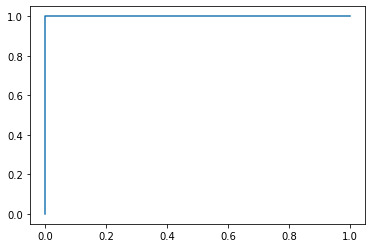

In [157]:
 fpr, tpr, threshold = roc_curve(y_train, y_pred_tr)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = f'Folf number {i+1} (AUC = {roc_auc:.4f})')


In [150]:
roc_curve(y_val,y_pred_val)

(array([0.        , 0.00598759, 1.        ]),
 array([0.        , 0.04331182, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [159]:
 fpr, tpr, threshold = roc_curve(y_val, y_pred_val)

In [162]:
tpr.mean()

0.3882369571886598

In [165]:
confusion_matrix(y_val,y_pred_val1)

array([[96951,   584],
       [21492,   973]], dtype=int64)

In [167]:
auc(y_train,y_pred_tr)

ValueError: x is neither increasing nor decreasing : [0 0 1 ... 0 0 1].

In [180]:
type(y_pred_tr[1])

numpy.float64

In [182]:
y_train = y_train.astype(np.float64)

In [183]:
y_train

array([0., 0., 1., ..., 0., 0., 1.])

In [187]:
accuracy_score(y_val,y_pred_val1)

0.8160333333333334

In [189]:
from sklearn.ensemble import ExtraTreesClassifier

In [190]:
ext = ExtraTreesClassifier(n_estimators=100,n_jobs=-1)

In [192]:
ext.fit(X_train,y_train)
accuracy_score(y_train,ext.predict(X_train))
accuracy_score(y_val,ext.predict(X_val))

0.8150916666666667

In [193]:
accuracy_score(y_train,ext.predict(X_train))


1.0

In [200]:
param_grid = {'n_estimators':[50,100],'max_depth':[3,5,None],'criterion':["gini","entropy"]}

In [203]:
grid = GridSearchCV(ext,param_grid=param_grid,cv=2,scoring='accuracy')

In [204]:
grid.fit(X_train,y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entr

In [205]:
grid.best_score_

0.8142958333333333

In [206]:
model = grid.best_estimator_ 